In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [99]:
df = pd.read_csv('Groceries_dataset.csv')
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [101]:
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [118]:
df.duplicated().any()

False

In [103]:
df.drop_duplicates(inplace=True)

In [117]:
df.duplicated().any()

False

In [104]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

C:\Users\ssw10\AppData\Local\Temp\ipykernel_22464\4160170784.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38006 entries, 0 to 38764
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38006 non-null  int64         
 1   Date             38006 non-null  datetime64[ns]
 2   itemDescription  38006 non-null  object        
 3   Day              38006 non-null  int64         
 4   Month            38006 non-null  int64         
 5   Year             38006 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 2.0+ MB


In [106]:
df['Day_of_Week'] = df['Date'].dt.dayofweek

In [107]:
df.head()

,Member_number,Date,itemDescription,Day,Month,Year,Day_of_Week
0,1808,2015-07-21,tropical fruit,21,7,2015,1
1,2552,2015-05-01,whole milk,1,5,2015,4
2,2300,2015-09-19,pip fruit,19,9,2015,5
3,1187,2015-12-12,other vegetables,12,12,2015,5
4,3037,2015-01-02,whole milk,2,1,2015,4


In [108]:
print(len(df['Member_number'].unique()))
print(len(df['itemDescription'].unique()))

3898
167


In [109]:
freq_items = df['itemDescription'].value_counts()
freq_items.head(10)

whole milk          2363
other vegetables    1827
rolls/buns          1646
soda                1453
yogurt              1285
root vegetables     1041
tropical fruit      1014
bottled water        908
sausage              903
citrus fruit         795
Name: itemDescription, dtype: int64

In [110]:
user_id = df['Member_number'].unique()
items = [list(df.loc[df['Member_number'] == id, 'itemDescription']) for id in user_id]
print(items[0])

['tropical fruit', 'long life bakery product', 'meat', 'sugar', 'rolls/buns', 'semi-finished bread', 'whole milk', 'citrus fruit', 'candy', 'napkins']


In [111]:
#!pip install mlxtend

from mlxtend.preprocessing import TransactionEncoder
TE = TransactionEncoder()
TE.fit(items)
item_transformed = TE.transform(items)
item_matrix = pd.DataFrame(item_transformed, columns = TE.columns_)
item_matrix.head()


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False


In [112]:
from mlxtend.frequent_patterns import apriori, association_rules
freq_items = apriori(item_matrix, min_support=0.001, use_colnames=True, max_len=2)
freq_items.sort_values(by = "support", ascending = False)

,support,itemsets
161,0.458184,(whole milk)
100,0.376603,(other vegetables)
119,0.349666,(rolls/buns)
135,0.313494,(soda)
162,0.282966,(yogurt)
...,...,...
2135,0.001026,"(nut snack, chicken)"
459,0.001026,"(sausage, bathroom cleaner)"
5337,0.001026,"(pickled vegetables, salt)"
1986,0.001026,"(cereals, onions)"


In [113]:
rules = association_rules(freq_items, metric = "lift")
rules.sort_values('confidence', ascending = False, inplace = True)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
11127,(whisky),(whole milk),0.002052,0.458184,0.002052,1.000000,2.182531,0.001112,inf,0.542931
8806,(meat spreads),(whole milk),0.008979,0.458184,0.007183,0.800000,1.746025,0.003069,2.709082,0.431142
6513,(frozen chicken),(other vegetables),0.001283,0.376603,0.001026,0.800000,2.124251,0.000543,3.116983,0.529926
4802,(cookware),(whole milk),0.004361,0.458184,0.003335,0.764706,1.668994,0.001337,2.302719,0.402593
10445,(whisky),(root vegetables),0.002052,0.230631,0.001539,0.750000,3.251947,0.001066,3.077476,0.693916


In [114]:
rules = rules[rules['confidence'] > 0.1].copy()
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
11127,(whisky),(whole milk),0.002052,0.458184,0.002052,1.000000,2.182531,0.001112,inf,0.542931
8806,(meat spreads),(whole milk),0.008979,0.458184,0.007183,0.800000,1.746025,0.003069,2.709082,0.431142
6513,(frozen chicken),(other vegetables),0.001283,0.376603,0.001026,0.800000,2.124251,0.000543,3.116983,0.529926
4802,(cookware),(whole milk),0.004361,0.458184,0.003335,0.764706,1.668994,0.001337,2.302719,0.402593
10445,(whisky),(root vegetables),0.002052,0.230631,0.001539,0.750000,3.251947,0.001066,3.077476,0.693916


In [115]:
rows = rules.shape[0]
print(f'Number of rules: {rows}')

Number of rules: 4591


In [116]:
rules['support'].describe()

count    4591.000000
mean        0.012461
std         0.017743
min         0.001026
25%         0.002309
50%         0.005644
75%         0.015136
max         0.191380
Name: support, dtype: float64

In [119]:
rules.sort_values(by='lift',ascending=False).head(10).iloc[:,:-2][['antecedents',
                                                                  'consequents',
                                                                   'consequent support',
                                                                  'lift']]

,antecedents,consequents,consequent support,lift
8093,(jam),(rice),0.012571,9.358944
3273,(rum),(canned vegetables),0.020523,6.090625
9222,(ready soups),(oil),0.055670,5.987711
3593,(ready soups),(chewing gum),0.044638,5.973946
3425,(tea),(cat food),0.043869,5.909898
5241,(decalcifier),(dessert),0.086455,5.140785
3188,(canned fruit),(soft cheese),0.037712,5.050858
7740,(tea),(herbs),0.039251,4.717986
5275,(dental care),(seasonal products),0.025911,4.678068
5201,(curd cheese),(mustard),0.023345,4.655996


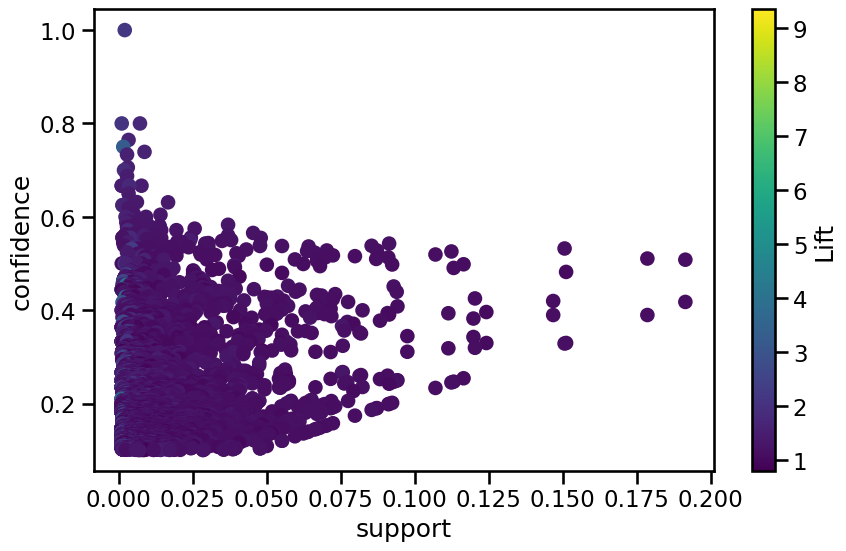

In [120]:
sup = rules['support'].values
conf = rules['confidence'].values
lift = rules['lift'].values

plt.figure(figsize=(10,6))
sc = plt.scatter(sup,conf,c=lift)
plt.colorbar(sc,label='Lift')
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [123]:
# regarding the whole mike has the highest support, choose it as the item for the basket analysis
rules_sel = rules[rules["antecedents"].apply(lambda x: "whole milk" in x)]
rules_sel.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
9499,(whole milk),(other vegetables),0.458184,0.376603,0.191380,0.417693,1.109106,0.018827,1.070564,0.181562
10377,(whole milk),(rolls/buns),0.458184,0.349666,0.178553,0.389698,1.114484,0.018342,1.065592,0.189591
10859,(whole milk),(soda),0.458184,0.313494,0.151103,0.329787,1.051973,0.007465,1.024310,0.091184
11141,(whole milk),(yogurt),0.458184,0.282966,0.150590,0.328667,1.161510,0.020940,1.068076,0.256640
11085,(whole milk),(tropical fruit),0.458184,0.233710,0.116470,0.254199,1.087672,0.009388,1.027473,0.148768
10451,(whole milk),(root vegetables),0.458184,0.230631,0.113135,0.246920,1.070630,0.007464,1.021630,0.121758
1725,(whole milk),(bottled water),0.458184,0.213699,0.112365,0.245241,1.147597,0.014452,1.041790,0.237376
10637,(whole milk),(sausage),0.458184,0.206003,0.106978,0.233483,1.133394,0.012591,1.035850,0.217222
4325,(whole milk),(citrus fruit),0.458184,0.185480,0.092355,0.201568,1.086737,0.007371,1.020150,0.147309
10745,(whole milk),(shopping bags),0.458184,0.168291,0.091329,0.199328,1.184422,0.014220,1.038763,0.287379


In [125]:
# get the most important items that customers would buy after purchasing whole milk 
rules_support = rules_sel['support'] >= rules_sel['support'].quantile(q = 0.95)
rules_confi = rules_sel['confidence'] >= rules_sel['confidence'].quantile(q = 0.95)
rules_lift = rules_sel['lift'] > 1
rules_best = rules_sel[rules_support & rules_confi & rules_lift]
rules_best

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
9499,(whole milk),(other vegetables),0.458184,0.376603,0.191380,0.417693,1.109106,0.018827,1.070564,0.181562
10377,(whole milk),(rolls/buns),0.458184,0.349666,0.178553,0.389698,1.114484,0.018342,1.065592,0.189591
